# Image Captioning

Image captioning is a project that involves using deep learning techniques to automatically generate descriptive captions for images. The goal of the project is to teach a machine learning model to understand the content of an image and use that understanding to generate human-like descriptions of the image.

The project typically involves the following steps:

1. Data collection and preprocessing: 
This involves collecting a large dataset of images and their corresponding captions. The images may be sourced from various places, such as online image repositories or a specific domain. The captions may be generated by humans or extracted from existing sources.
2. Training a deep learning model: 
This involves training a neural network model on the collected dataset. The model will typically consist of an image encoder and a language decoder. The image encoder will learn to extract features from the image, while the language decoder will learn to generate captions based on those features.
3. Evaluation: 
Once the model is trained, it needs to be evaluated to determine its performance. This can be done by measuring metrics such as the accuracy of the generated captions or the similarity between the generated captions and the human-written captions.
4. Deployment: 
Finally, the model can be deployed to generate captions for new images. This can be done by feeding the image through the trained model, which will generate a caption based on the features extracted from the image.

Overall, the goal of image captioning is to create a system that can automatically generate accurate and human-like descriptions of images, which has potential applications in areas such as image search, visual storytelling, and accessibility.

## Setup

In [ ]:
import string
import numpy as np
from PIL import Image
import os
from pickle import dump, load
import numpy as np
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [4]:
# Loading a text file into memory
def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

Check the images text file we can realize that

In [5]:
# get all imgs with their captions
def get_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

In [6]:
#Data cleaning- lower casing, removing puntuations and words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
            img_caption.replace("-"," ")
            desc = img_caption.split()
            #converts to lowercase
            desc = [word.lower() for word in desc]
            #remove punctuation from each token
            desc = [word.translate(table) for word in desc]
            #remove hanging 's and a 
            desc = [word for word in desc if(len(word)>1)]
            #remove tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            #convert back to string
            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

In [7]:
def text_vocabulary(descriptions):
    # build vocabulary of all unique words
    vocab = set()
    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]
    return vocab

In [8]:
#All descriptions in one file 
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()

In [9]:
# Set these path according to project folder in you system
dataset_text = "Flickr8k_text"
dataset_images = "Flicker8k_Dataset"

In [10]:
#we prepare our text data
filename = dataset_text + "/" + "Flickr8k.token.txt"
#loading the file that contains all data
#mapping them into descriptions dictionary img to 5 captions
descriptions = get_captions(filename)
print("Length of descriptions =" ,len(descriptions))

Length of descriptions = 8092


In [11]:
#cleaning the descriptions
clean_descriptions = cleaning_text(descriptions)
#building vocabulary 
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))
#saving each description to file 
save_descriptions(clean_descriptions, "descriptions.txt")

Length of vocabulary =  8763


In [12]:
# Now extract the features from Xception model
def extract_features(directory):
    model = Xception(include_top=False, pooling='avg')
    features = {}
    for img in tqdm(os.listdir(directory)):
        filename = directory + '/' +img
        image = Image.open(filename)
        image = np.expand_dims(image.resize((299,299)),axis=0)
        image = image/127.5 - 1.0
        
        feature = model.predict(image)
        features[img] = feature
    return features

In [11]:
#2048 feature vector
features = extract_features(dataset_images)
dump(features, open("features.p","wb"))

2023-02-25 17:26:57.395671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/hp/m_3sfw2d3gnd52gvxwg38bk00000gn/T/ipykernel_74740/4062427556.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img in tqdm(os.listdir(directory)):


  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 455ms/step


1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 457ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 542ms/step


1/1 [==============================] - 0s 307ms/step


1/1 [==============================] - 1s 634ms/step


1/1 [==============================] - 0s 479ms/step


1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 426ms/step


1/1 [==============================] - 1s 782ms/step


1/1 [==============================] - 0s 489ms/step


1/1 [==============================] - 0s 272ms/step


1/1 [==============================] - 0s 290ms/step


1/1 [==============================] - 1s 594ms/step


1/1 [==============================] - 0s 467ms/step


1/1 [==============================] - 0s 499ms/step


1/1 [==============================] - 1s 858ms/step


1/1 [==============================] - 0s 416ms/step


1/1 [==============================] - 0s 490ms/step


1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 494ms/step


1/1 [==============================] - 1s 608ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 506ms/step


1/1 [==============================] - 0s 452ms/step


1/1 [==============================] - 0s 367ms/step


In [13]:
features = load(open("features.p",'rb'))

In [14]:
#load the data 
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos


def load_clean_descriptions(filename, photos): 
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions


def load_features(photos):
    #loading all features
    all_features = load(open("features.p","rb"))
    #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features


filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

In [15]:
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

#creating tokenizer class 
#this will vectorise text corpus
#each integer will represent token in dictionary

from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7577

In [16]:
#calculate maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    
max_length = max_length(descriptions)
max_length

32

In [17]:
#create input-output sequence pairs from the image description.

#data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            #retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [[input_image, input_sequence], output_word]

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

#You can check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape
#((47, 2048), (47, 32), (47, 7577))

((47, 2048), (47, 32), (47, 7577))

In [18]:
from keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [26]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
#epochs = 10
epochs = 5
steps = len(train_descriptions)
# making a directory models to save our models
os.mkdir("models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("models/model_" + str(i) + ".h5")

Dataset:  6000
Descriptions: train= 6000
Photos: train= 6000
Vocabulary Size: 7577
Description Length:  32
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 32, 256)      1939712     ['input_9[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 2048)         0           ['input_8[0][0]']  

/var/folders/hp/m_3sfw2d3gnd52gvxwg38bk00000gn/T/ipykernel_74740/2198182336.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)


6000/6000 [==============================] - 26274s 4s/step - loss: 3.0748


In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse

In [22]:
def extract_features(filename, model):
    try:
        image = Image.open(filename)
    
    except:
        print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
    image = image.resize((299,299))
    image = np.array(image)
    # for images that has 4 channels, we convert them into 3 channels
    if image.shape[2] == 4: 
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

In [23]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [24]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

1/1 [==============================] - 1s 825ms/step


man in red shirt is doing trick on skateboard.


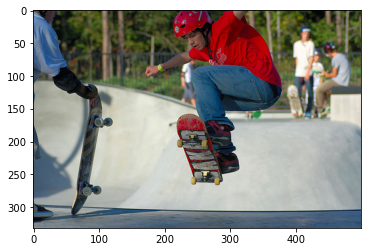

In [92]:
import os
import random
import cv2

folder_path = 'Flicker8k_Dataset'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")]

# Randomly select a image file from the list
img_path = random.sample(image_files,1)[0]

max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_4.h5')
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)[6:-4] +'.'
print("\n")
print(description)
plt.imshow(img)